In [1]:
from scipy.spatial import distance
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

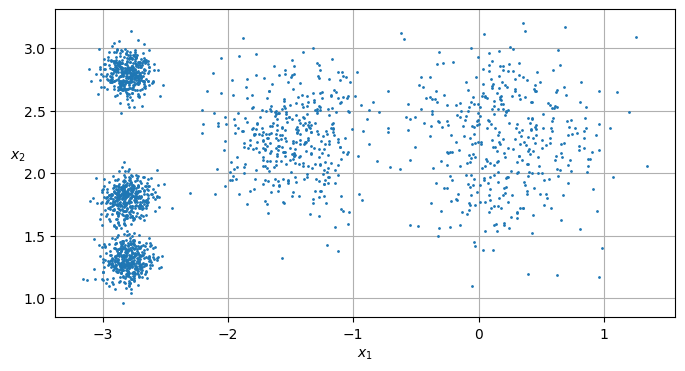

In [3]:

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

In [4]:
model=KMeans(n_clusters=5,n_init=10,random_state=42)
model.fit(X)
print(model.cluster_centers_)
print(model.inertia_)

[[-2.80214068  1.55162671]
 [ 0.08703534  2.58438091]
 [-1.46869323  2.28214236]
 [-2.79290307  2.79641063]
 [ 0.31332823  1.96822352]]
219.4280007364759


# Image Segmentation

In [5]:
import PIL

In [6]:
file='C:/Users/sudip/Downloads/Garhwal dec 2009/097.JPG'
image=PIL.Image.open(file)

In [7]:
img_arr=np.asarray(image)
print(img_arr.shape)

(1200, 1600, 3)


In [8]:
X=img_arr.reshape(-1,3)

In [9]:
X = img_arr.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, n_init=10, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(img_arr.shape)

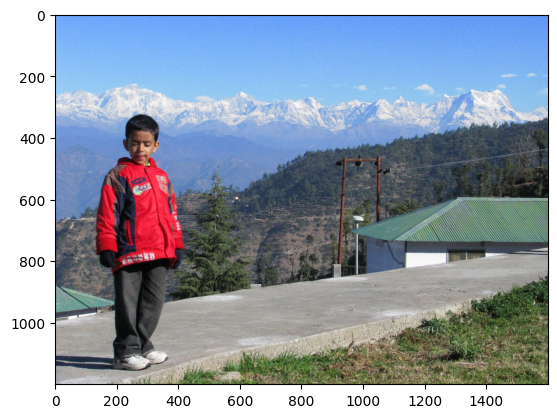

In [10]:
plt.imshow(image)

In [11]:
segmented_img=segmented_img.astype(dtype=int)

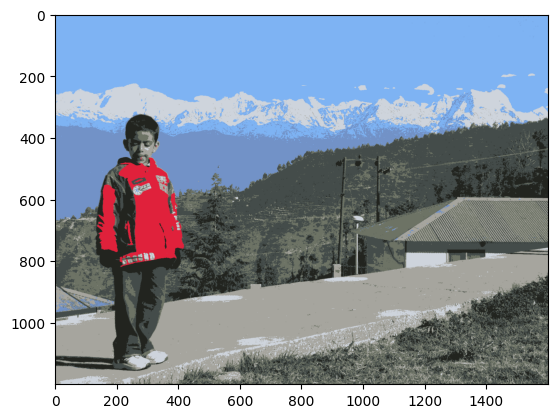

In [12]:
plt.imshow(segmented_img)

In [13]:
segmented_img.shape

(1200, 1600, 3)

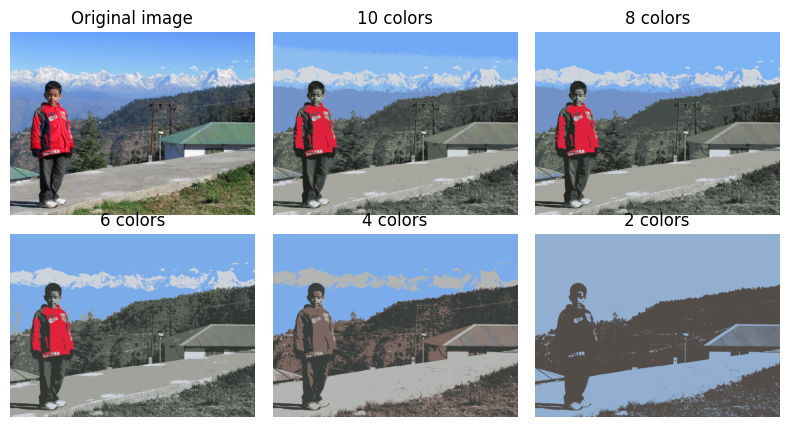

In [14]:

segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(img_arr.shape))

plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(2, 3, 2 + idx)
    plt.imshow(segmented_imgs[idx] / 255)
    plt.title(f"{n_clusters} colors")
    plt.axis('off')
